In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('relevant_data.csv')
df["sensor"] = df['pgn'].astype(str) +"-"+ df["spn"].astype(str)
df_copy = df.copy()
df_copy.head()

,Unnamed: 0,timestamp,pgn,spn,decodedValue,sensor
0,47618823,0,61443,2979,0.0,61443-2979
1,47618824,0,61443,559,1.0,61443-559
2,47618826,0,61443,2970,1.0,61443-2970
3,47618827,0,61443,91,0.0,61443-91
4,47618828,0,61443,92,6.0,61443-92


In [5]:
df_copy.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df_copy.head(10)

,timestamp,pgn,spn,decodedValue,sensor
0,0,61443,2979,0.0,61443-2979
1,0,61443,559,1.0,61443-559
2,0,61443,2970,1.0,61443-2970
3,0,61443,91,0.0,61443-91
4,0,61443,92,6.0,61443-92
5,0,61443,1437,0.0,61443-1437
6,0,61443,5021,0.0,61443-5021
7,0,61443,3357,39.6,61443-3357
8,0,61443,5398,1.0,61443-5398
9,0,61443,2979,0.0,61443-2979


In [7]:
def moving_avg(x, N=1000):
    return np.convolve(x, np.ones((N,))/N, mode='valid')

### Visualizing Pedal Position and Engine Data

269879


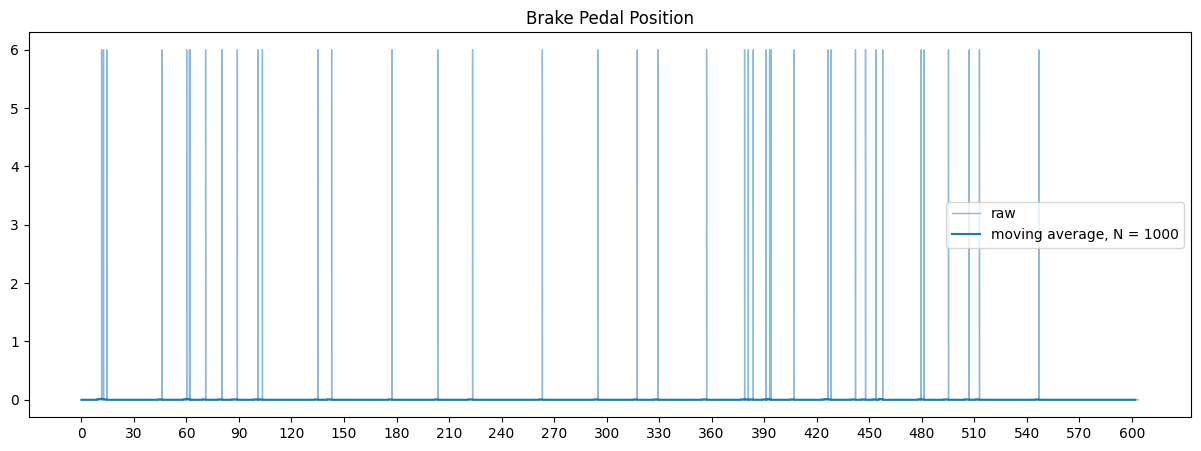

In [8]:
vals = df_copy.loc[(df_copy['sensor']=='61441-521'), 'decodedValue']
ts = df_copy.loc[(df_copy['sensor']=='61441-521'), 'timestamp']
avg = moving_avg(vals, 1000)
print(len(avg))
plt.figure(figsize=(15,5))
plt.plot(ts/60000, vals, linewidth=1, alpha=0.5, label='raw')
plt.plot(ts[:(len(vals)-999)]/60000, avg, 'C0', label = 'moving average, N = 1000')
plt.xticks(np.arange(min(ts/60000), max(ts/60000)+1, 30.0))
plt.legend()
plt.title('Brake Pedal Position')
plt.show()

485889


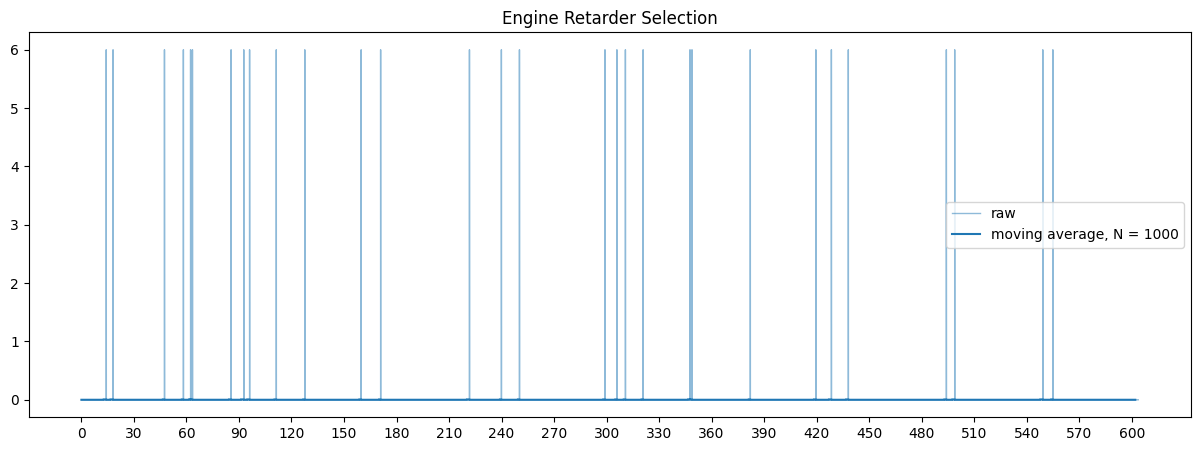

In [9]:
vals = df_copy.loc[(df_copy['sensor']=='61441-973'), 'decodedValue']
ts = df_copy.loc[(df_copy['sensor']=='61441-973'), 'timestamp']
avg = moving_avg(vals, 1000)
print(len(avg))
plt.figure(figsize=(15,5))
plt.plot(ts/60000, vals, linewidth=1, alpha=0.5, label='raw')
plt.plot(ts[:(len(vals)-999)]/60000, avg, 'C0', label = 'moving average, N = 1000')
plt.xticks(np.arange(min(ts/60000), max(ts/60000)+1, 30.0))
plt.legend()
plt.title('Engine Retarder Selection')
plt.show()

767
776


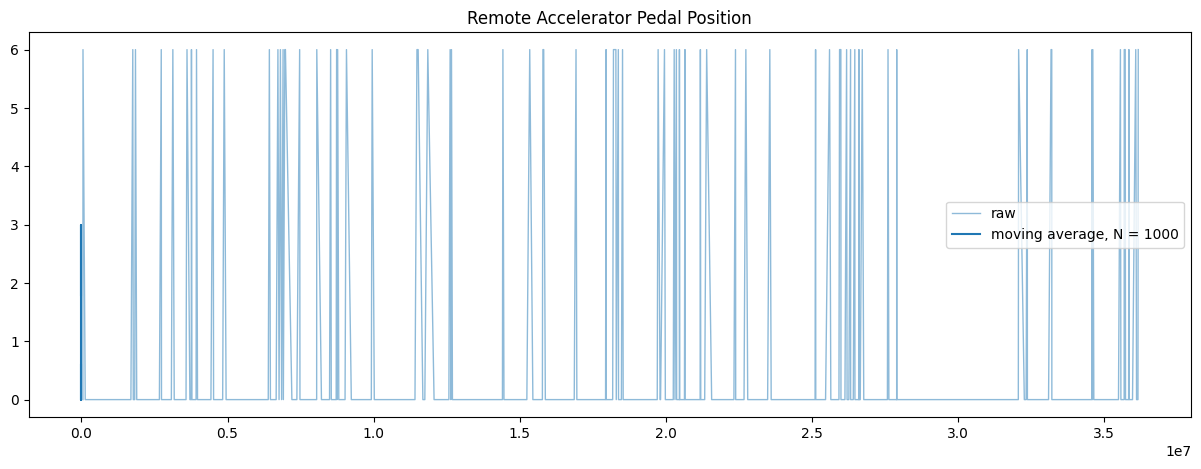

In [10]:
vals = df_copy.loc[(df_copy['sensor']=='61443-974'), 'decodedValue']
ts = df_copy.loc[(df_copy['sensor']=='61443-974'), 'timestamp']
avg = moving_avg(vals, 10)
print(len(avg))
print(len(vals))
plt.figure(figsize=(15,5))
plt.plot(vals, linewidth=1, alpha=0.5, label='raw')
plt.plot(avg, 'C0', label = 'moving average, N = 1000')
#plt.xticks(np.arange(min(ts/60000), max(ts/60000)+1, 30.0))
plt.legend()
plt.title('Remote Accelerator Pedal Position')
plt.show()

976


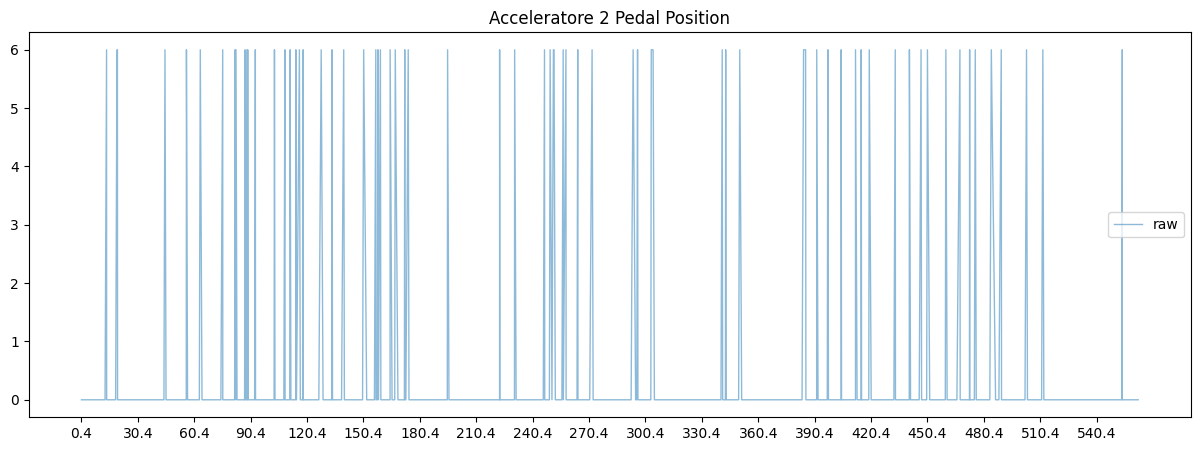

In [11]:
vals = df_copy.loc[(df_copy['sensor']=='61443-29'), 'decodedValue']
ts = df_copy.loc[(df_copy['sensor']=='61443-29'), 'timestamp']
avg = moving_avg(vals, 5)
print(len(avg))
plt.figure(figsize=(15,5))
plt.plot(ts/60000, vals, linewidth=1, alpha=0.5, label='raw')
#plt.plot(ts[:(len(vals)-999)]/60000, avg, 'C0', label = 'moving average, N = 1000')
plt.xticks(np.arange(min(ts/60000), max(ts/60000)+1, 30.0))
plt.legend()
plt.title('Acceleratore 2 Pedal Position')
plt.show()

1111429


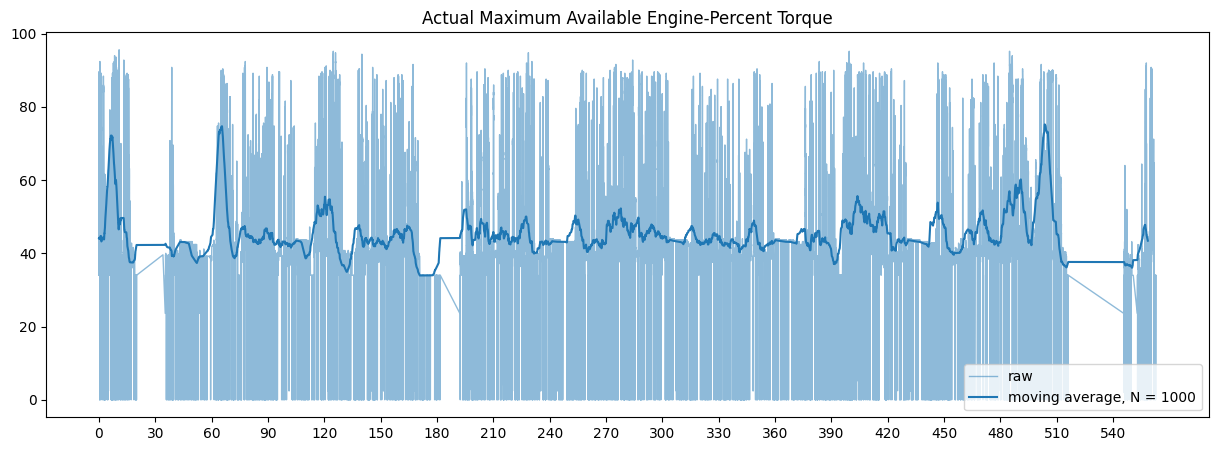

In [12]:
#This is the maximum amount of torque that the engine can immediately deliver as a percentage of the reference engine torque
vals = df_copy.loc[(df_copy['sensor']=='61443-3357'), 'decodedValue']
ts = df_copy.loc[(df_copy['sensor']=='61443-3357'), 'timestamp']
avg = moving_avg(vals, 10000)
print(len(avg))
plt.figure(figsize=(15,5))
plt.plot(ts/60000, vals, linewidth=1, alpha=0.5, label='raw')
plt.plot(ts[:(len(vals)-9999)]/60000, avg, 'C0', label = 'moving average, N = 1000')
plt.xticks(np.arange(min(ts/60000), max(ts/60000)+1, 30.0))
plt.legend()
plt.title('Actual Maximum Available Engine-Percent Torque')
plt.show()

1116429


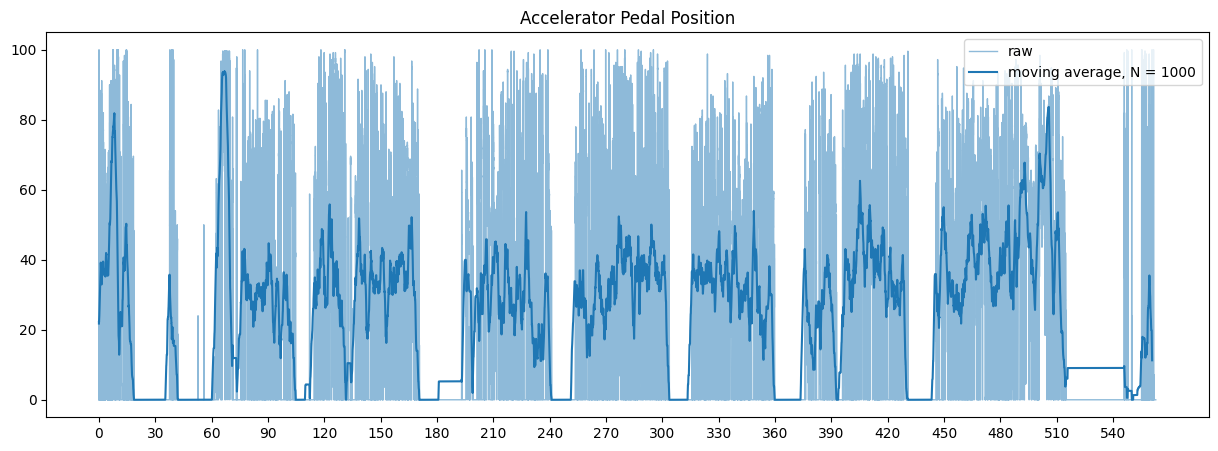

In [13]:
#The ratio of actual position of the analog engine speed/torque request input device (such as an accelerator pedal or throttle lever) to the maximum position of the input device.
vals = df_copy.loc[(df_copy['sensor']=='61443-91'), 'decodedValue']
ts = df_copy.loc[(df_copy['sensor']=='61443-91'), 'timestamp']
avg = moving_avg(vals, 5000)
print(len(avg))
plt.figure(figsize=(15,5))
plt.plot(ts/60000, vals, linewidth=1, alpha=0.5, label='raw')
plt.plot(ts[:(len(vals)-4999)]/60000, avg, 'C0', label = 'moving average, N = 1000')
plt.xticks(np.arange(min(ts/60000), max(ts/60000)+1, 30.0))
plt.legend()
plt.title('Accelerator Pedal Position')
plt.show()

1116425


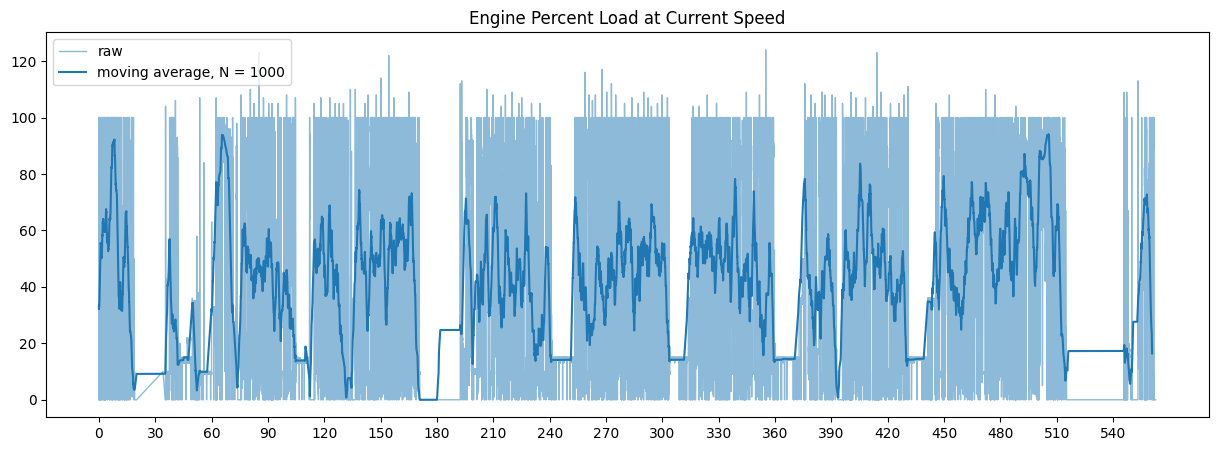

In [14]:
vals = df_copy.loc[(df_copy['sensor']=='61443-92'), 'decodedValue']     #The ratio of actual engine percent torque (indicated) to maximum indicated torque available at the current engine speed, clipped to zero torque during engine braking.
ts = df_copy.loc[(df_copy['sensor']=='61443-92'), 'timestamp']
avg = moving_avg(vals, 5000)
print(len(avg))
plt.figure(figsize=(15,5))
plt.plot(ts/60000, vals, linewidth=1, alpha=0.5, label='raw')
plt.plot(ts[:(len(vals)-4999)]/60000, avg, 'C0', label = 'moving average, N = 1000')
plt.xticks(np.arange(min(ts/60000), max(ts/60000)+1, 30.0))
plt.legend()
plt.title('Engine Percent Load at Current Speed')
plt.show()

1335084


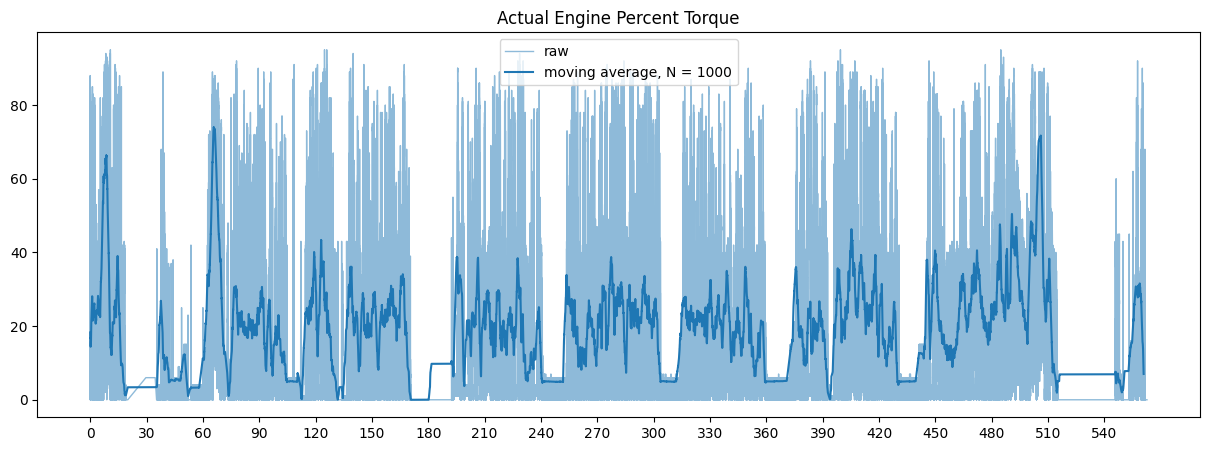

In [15]:
#The calculated output torque of the engine. The data is transmitted in indicated torque as a percent of reference engine torque, also includes torque developed in the engines to overcome friction
vals = df_copy.loc[(df_copy['sensor']=='61444-513'), 'decodedValue']        
ts = df_copy.loc[(df_copy['sensor']=='61444-513'), 'timestamp']
avg = moving_avg(vals, 5000)
print(len(avg))
plt.figure(figsize=(15,5))
plt.plot(ts/60000, vals, linewidth=1, alpha=0.5, label='raw')
plt.plot(ts[:(len(vals)-4999)]/60000, avg, 'C0', label = 'moving average, N = 1000')
plt.xticks(np.arange(min(ts/60000), max(ts/60000)+1, 30.0))
plt.legend()
plt.title('Actual Engine Percent Torque')
plt.show()

1335354


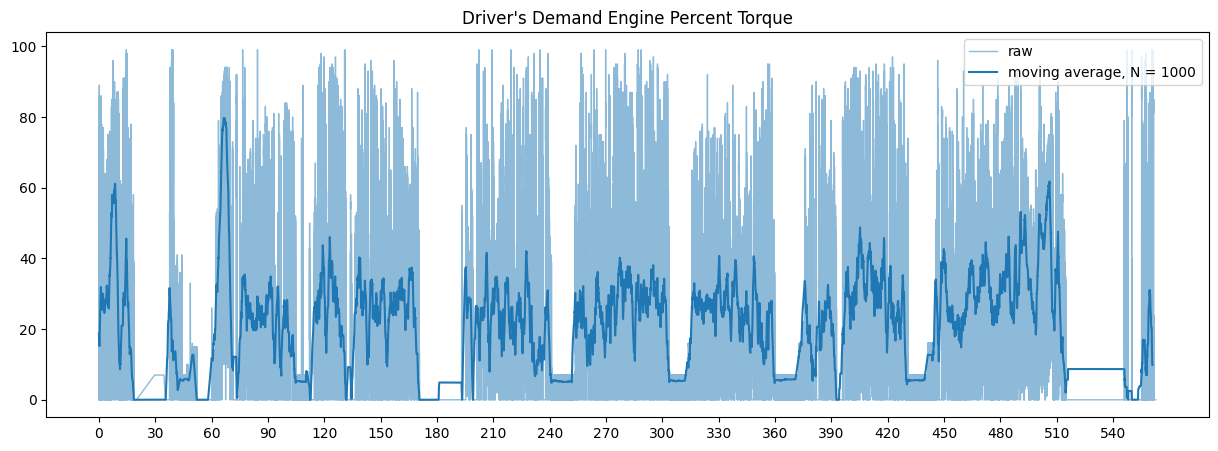

In [16]:
vals = df_copy.loc[(df_copy['sensor']=='61444-512'), 'decodedValue']            #based on the driver's pedal, cruise control, and speed governor
ts = df_copy.loc[(df_copy['sensor']=='61444-512'), 'timestamp']
avg = moving_avg(vals, 5000)
print(len(avg))
plt.figure(figsize=(15,5))
plt.plot(ts/60000, vals, linewidth=1, alpha=0.5, label='raw')
plt.plot(ts[:(len(vals)-4999)]/60000, avg, 'C0', label = 'moving average, N = 1000')
plt.xticks(np.arange(min(ts/60000), max(ts/60000)+1, 30.0))
plt.legend()
plt.title('Driver\'s Demand Engine Percent Torque')
plt.show()

1330855


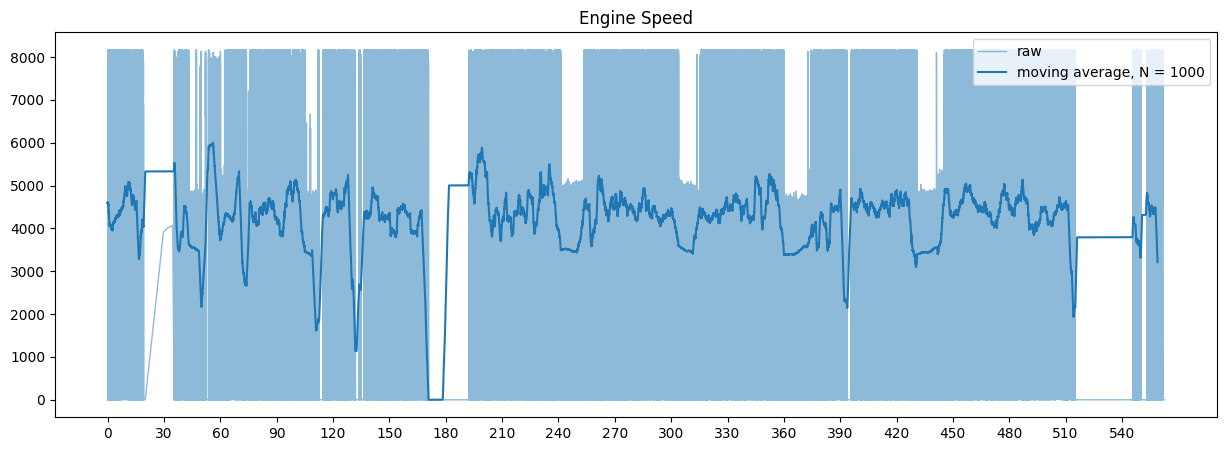

In [17]:
vals = df_copy.loc[(df_copy['sensor']=='61444-190'), 'decodedValue']            #Actual engine speed which is calculated over a minimum crankshaft angle of 720 degrees divided by the number of cylinders.
ts = df_copy.loc[(df_copy['sensor']=='61444-190'), 'timestamp']
avg = moving_avg(vals, 10000)
print(len(avg))
plt.figure(figsize=(15,5))
plt.plot(ts/60000, vals, linewidth=1, alpha=0.5, label='raw')
plt.plot(ts[:(len(vals)-9999)]/60000, avg, 'C0', label = 'moving average, N = 1000')
plt.xticks(np.arange(min(ts/60000), max(ts/60000)+1, 30.0))
plt.legend()
plt.title('Engine Speed')
plt.show()

1137396


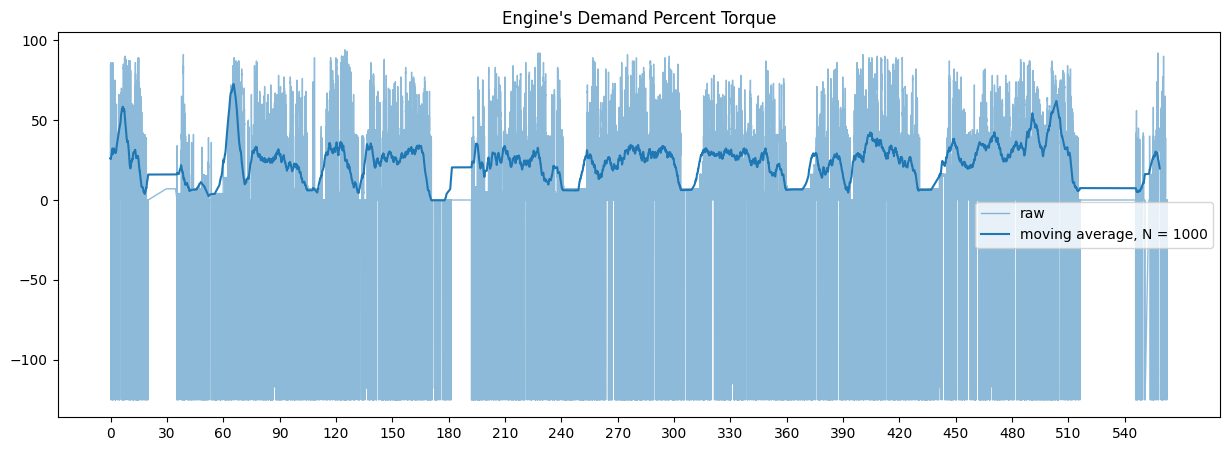

In [18]:
vals = df_copy.loc[(df_copy['sensor']=='61444-2432'), 'decodedValue']                   #torque requested by all components internal to the powertrain
ts = df_copy.loc[(df_copy['sensor']=='61444-2432'), 'timestamp']
avg = moving_avg(vals, 10000)
print(len(avg))
plt.figure(figsize=(15,5))
plt.plot(ts/60000, vals, linewidth=1, alpha=0.5, label='raw')
plt.plot(ts[:(len(vals)-9999)]/60000, avg, 'C0', label = 'moving average, N = 1000')
plt.xticks(np.arange(min(ts/60000), max(ts/60000)+1, 30.0))
plt.legend()
plt.title('Engine\'s Demand Percent Torque')
plt.show()

214400


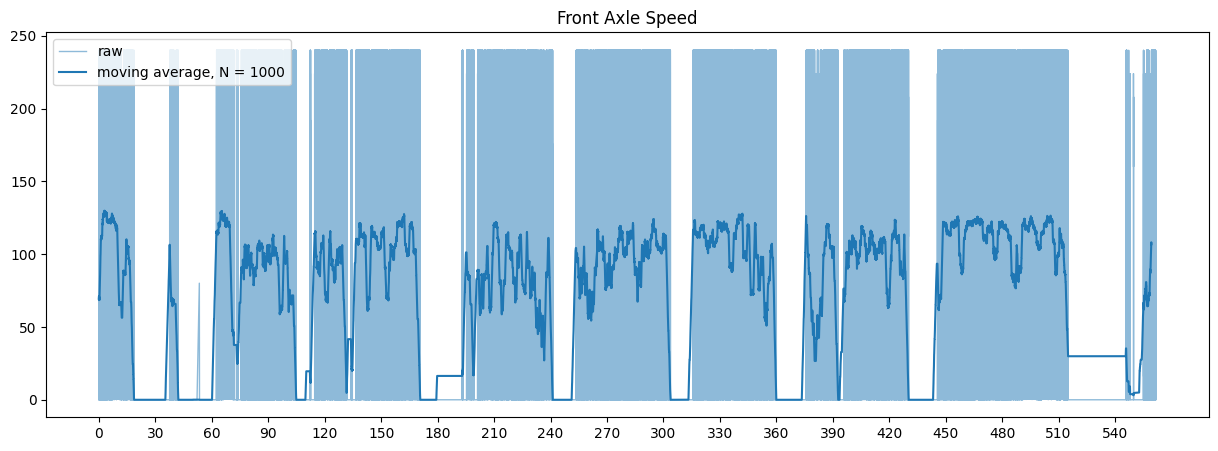

In [19]:
#Checking front wheel speed information
vals = df_copy.loc[(df_copy['sensor']=='65215-904'), 'decodedValue']
ts = df_copy.loc[(df_copy['sensor']=='65215-904'), 'timestamp']
avg = moving_avg(vals, 1000)
print(len(avg))
plt.figure(figsize=(15,5))
plt.plot(ts/60000, vals, linewidth=1, alpha=0.5, label='raw')
plt.plot(ts[:(len(vals)-999)]/60000, avg, 'C0', label = 'moving average, N = 1000')
plt.xticks(np.arange(min(ts/60000), max(ts/60000)+1, 30.0))
plt.legend()
plt.title('Front Axle Speed')
plt.show()

Creating a dataset with only relevant engine sensors

In [20]:
engine_sys = ['61443-91', '61444-513', '61444-512']
df_copy.drop('timestamp', axis=1, inplace= True)
df_copy = df_copy[df_copy['sensor'].isin(engine_sys)]

In [21]:
df_copy.shape

(3801864, 4)

In [22]:
df_copy.head()

,pgn,spn,decodedValue,sensor
3,61443,91,0.0,61443-91
13,61443,91,58.8,61443-91
18,61444,512,43.0,61444-512
20,61444,513,45.0,61444-513
26,61444,513,6.0,61444-513


In [23]:
lsofdicts = []                      #Reshaping the dataset to have each sensor as a column
for index,rows in df_copy.iterrows():
    x = rows[3]
    y = rows[2]
    z = {x: y}
    lsofdicts.append(z)
this_df = pd.DataFrame(lsofdicts)

In [24]:
this_df.head()

,61443-91,61444-512,61444-513
0,0.0,NaN,NaN
1,58.8,NaN,NaN
2,NaN,43.0,NaN
3,NaN,NaN,45.0
4,NaN,NaN,6.0


In [25]:
this_df.fillna(method='ffill', inplace=True)    #Filling null values with forward fill method
this_df.dropna(inplace=True)
this_df.head(10)

,61443-91,61444-512,61444-513
3,58.8,43.0,45.0
4,58.8,43.0,6.0
5,58.8,7.0,6.0
6,58.8,0.0,6.0
7,58.8,0.0,0.0
8,58.8,0.0,23.0
9,58.8,20.0,23.0
10,58.8,0.0,23.0
11,58.8,0.0,0.0
12,0.0,0.0,0.0


In [26]:
this_df.shape

(3801861, 3)

In [27]:
this_df.head()

,61443-91,61444-512,61444-513
3,58.8,43.0,45.0
4,58.8,43.0,6.0
5,58.8,7.0,6.0
6,58.8,0.0,6.0
7,58.8,0.0,0.0


Checking Distributions

<Axes: >

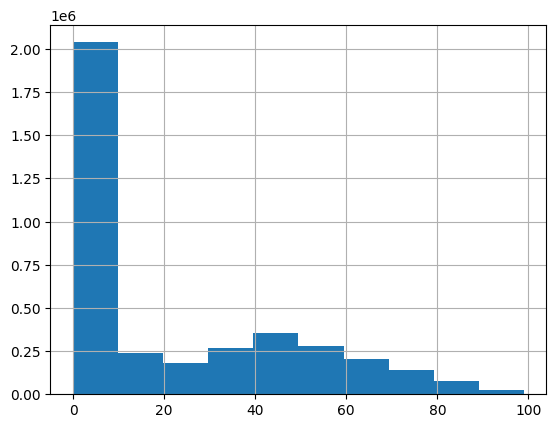

In [28]:
this_df['61444-512'].hist()     #Driver's demand percent torque

<Axes: >

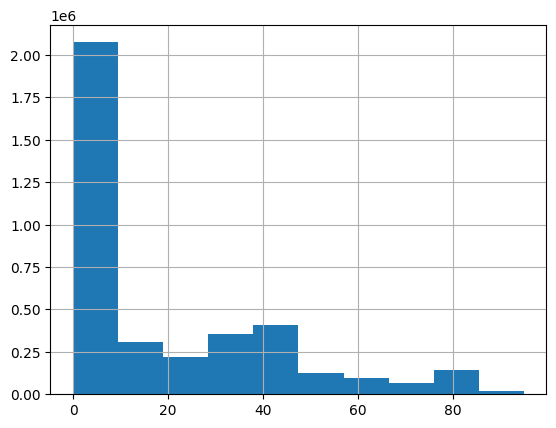

In [29]:
this_df['61444-513'].hist()     #Actual Engine Percent Torque

<Axes: >

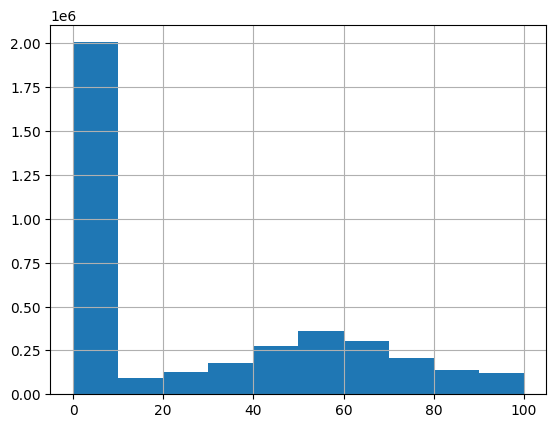

In [30]:
this_df['61443-91'].hist()      #Accelerator pedal position

In [31]:
this_df = this_df[::30][:]   #Reducing dataset size to 30%
this_df.to_csv('engine_system.csv') #csv with real engine sensor values